# Aplicación de t-SNE al conjunto de datos de dígitos manuscritos
Este cuaderno muestra cómo aplicar el método t-SNE para la reducción de dimensionalidad en el conjunto de datos de dígitos manuscritos y cómo visualizar los resultados.


In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

## Cargar el Conjunto de Datos

In [2]:
# Cargamos el conjunto de datos de dígitos manuscritos
digits = datasets.load_digits()

## Exploración de los Datos

In [3]:
# Datos de las imágenes y las etiquetas
X = digits.data  # Datos de las imágenes, cada una es un vector de 64 elementos
y = digits.target  # Etiquetas de los dígitos, el número que representan

# Mostramos las dimensiones de los datos
print(f"Dimensiones de los datos de las imágenes: {X.shape}")
print(f"Dimensiones de las etiquetas: {y.shape}")

Dimensiones de los datos de las imágenes: (1797, 64)
Dimensiones de las etiquetas: (1797,)


In [13]:
import pandas as pd

df=pd.DataFrame(X)
df['y']=y

df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [14]:
### Dividimos el dataset
from sklearn.model_selection import train_test_split

X_1,X_2,y_1,y_2=train_test_split(X,y,test_size=0.5)

In [23]:
df_1=pd.DataFrame(X_1)
df_1['y']=y_1
df_1['y'].value_counts()

y
8    105
1    104
2     95
4     93
5     87
3     87
7     86
9     85
6     79
0     77
Name: count, dtype: int64

In [24]:
df_2=pd.DataFrame(X_2)
df_2['y']=y_2
df_2['y'].value_counts()

y
6    102
0    101
3     96
5     95
9     95
7     93
4     88
2     82
1     78
8     69
Name: count, dtype: int64

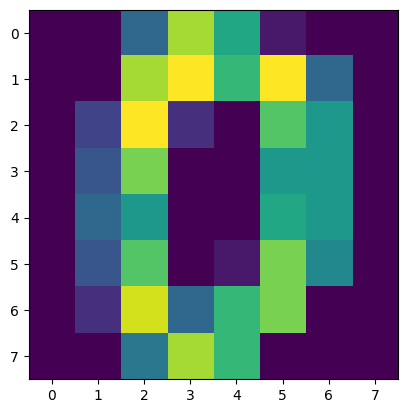

In [25]:
plt.imshow(X[0].reshape(8,8))

## Aplicación de t-SNE

In [31]:
# Configuración de t-SNE con 2 componentes
tsne_1 = TSNE(n_components=2, random_state=2340)
tsne_2 = TSNE(n_components=2, random_state=2340)

# Reducción de la dimensionalidad
X_2d_1 = tsne_1.fit_transform(X_1)

# Reducción de la dimensionalidad
X_2d_2= tsne_1.transform(X_2)

AttributeError: 'TSNE' object has no attribute 'transform'

## Visualización de los Resultados

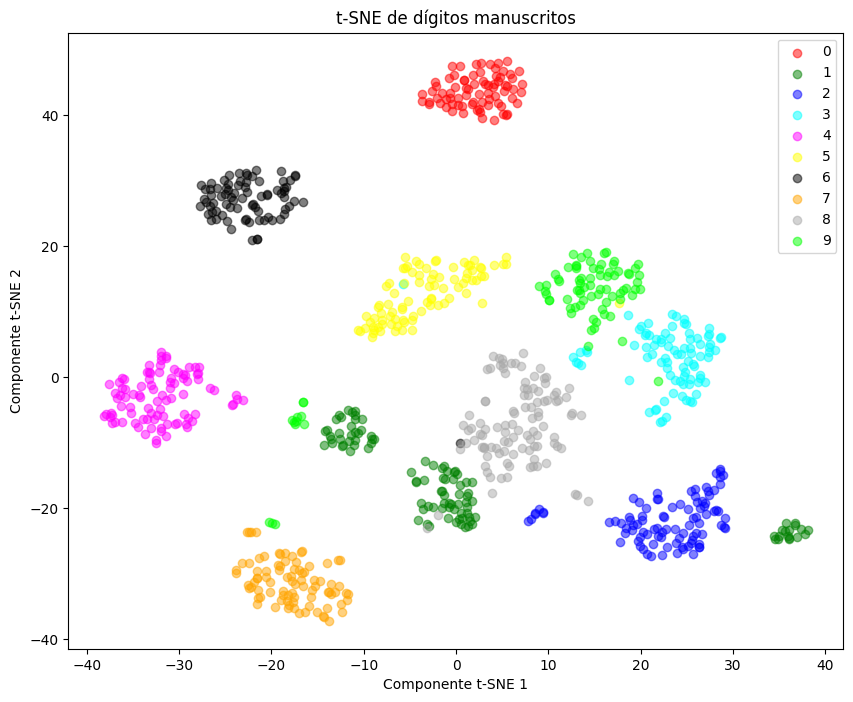

In [33]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 8))

# Colores para los dígitos del 0 al 9
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'darkgrey', 'lime']

# Dibujamos los puntos
for i, color in enumerate(colors):
    plt.scatter(X_2d_1[y_1 == i, 0], X_2d_1[y_1 == i, 1], c=color, label=i, alpha=0.5)
   # plt.scatter(X_2d_2[y_2 == i, 0], X_2d_2[y_2 == i, 1], c=color, label=i, alpha=0.5)

# Añadimos la leyenda y los títulos
plt.legend()
plt.title('t-SNE de dígitos manuscritos')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')

# Mostramos el gráfico
plt.show()